## Mini Project 3
**Customer Segmentation on "sales data sample"**

# 0. Set up & Load the data

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import pandas_profiling as pf

#viz Libraries
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance

#datetime
import datetime as dt

#StandardScaler
from sklearn.preprocessing import StandardScaler

#KMeans
from sklearn.cluster import KMeans

#Metrics
import sklearn.metrics.cluster
from sklearn.metrics import v_measure_score
from sklearn.metrics import silhouette_score
#from sklearn.metrics import warnings
#warnings.filterwarnings("ignore")

#file directory
import os

##warnings
#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# Load & reading the data
csv_file = 'sales_data_sample.csv'
df_sales = pd.read_csv(csv_file, encoding = 'unicode_escape')
df_sales.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue du Colonel Pierre Avia           NaN          Paris   NaN   
3             78934 Hillside Dr.           NaN       Pasadena    CA   
4                7734 Strong St.           NaN  San Francisco    CA   

  POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0      10022     USA       NaN              Yu             Kwai    Small  
1      51100  France      EMEA         Henriot             Paul    Small  
2      75508  France      EMEA        Da Cunha           Daniel   Medium  
3      90003     USA       NaN           Young            Julie   Medium  
4        NaN     USA       NaN           Brown            Julie   Medium  

[5 rows x 25 columns]

In [3]:
# Dimensions of the data
df_sales.shape 

(2823, 25)

**Dropping columns**

In [4]:
#Removing the variables which dont add significant value fot the analysis.
to_drop = ['PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE']
df_sales = df_sales.drop(to_drop, axis=1)

In [5]:
df_sales.shape

(2823, 20)

# 1. EDA

***Do some EDA of relationships between features***

In [6]:
pf.ProfileReport(df_sales)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Checking for null values**

In [7]:
df_sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Observation: I may not deal with the mising values of 'Territory' variable as it may not have a significant effect on the analysis.

**Checking for inconsistent data types**

In [8]:
df_sales.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Changing the data type of variable 'ORDERDATE' from object to datetime

In [9]:
df_sales['ORDERDATE'] = pd.to_datetime(df_sales['ORDERDATE'])

**Summary stats of Quantitative variables**

In [10]:
quant_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
df_sales[quant_vars].describe()

QUANTITYORDERED    PRICEEACH         SALES         MSRP
count      2823.000000  2823.000000   2823.000000  2823.000000
mean         35.092809    83.658544   3553.889072   100.715551
std           9.741443    20.174277   1841.865106    40.187912
min           6.000000    26.880000    482.130000    33.000000
25%          27.000000    68.860000   2203.430000    68.000000
50%          35.000000    95.700000   3184.800000    99.000000
75%          43.000000   100.000000   4508.000000   124.000000
max          97.000000   100.000000  14082.800000   214.000000

Observation: I've observed that there are no negative values for the quantitative variables, which is a good, because we cannot have negative prices or quantities.

## Univariate Analysis - Exploring the variables:

**a) Order Quantity Distribution**

C:\Users\mattb\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


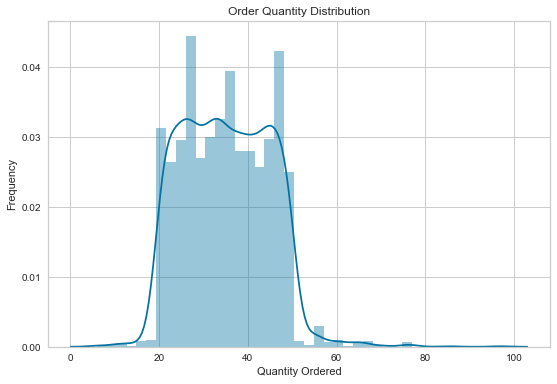

In [11]:
plt.figure(figsize=(9,6))
sns.distplot(df_sales['QUANTITYORDERED'])
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

Observation: From the distribution plot of quantity, we can infer that the orders are bulk orders. Majority of the order's quantity are between 20 - 50 units.

**b) Price Distribution**

C:\Users\mattb\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


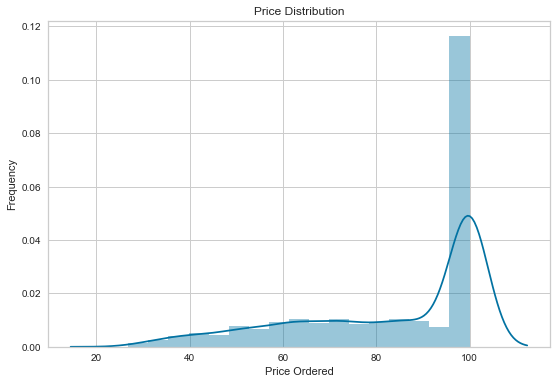

In [12]:
plt.figure(figsize=(9,6))
sns.distplot(df_sales['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

Observation: The distribution of Price is Left Skewed with max price of $100. Many of the orders recieved are of this price. Not investigating further about this particular product line which has the highest price, because the target is to segment the customers.

**c) Sales Distribution**

C:\Users\mattb\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


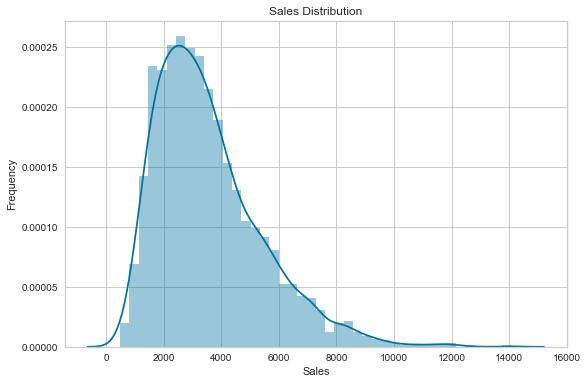

In [13]:
plt.figure(figsize=(9,6))
sns.distplot(df_sales['SALES'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

**d) MSRP (Manufacturer Suggested Retail Price) Distribution**

C:\Users\mattb\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


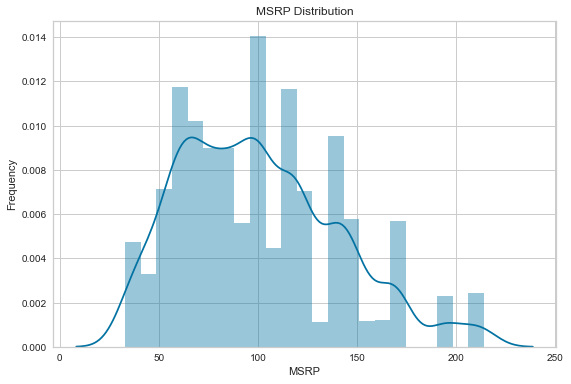

In [14]:
plt.figure(figsize=(9,6))
sns.distplot(df_sales['MSRP'])
plt.title('MSRP Distribution')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()

**e) Analysing the STATUS variable**

In [15]:
df_sales['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

**f) Checking the time range of the data**

In [16]:
df_sales.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

Observation: We dont have the complete data for 2005.

**g) Dealsize Distribution**

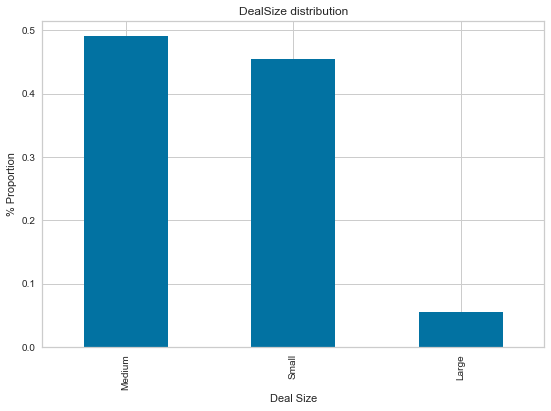

In [17]:
plt.figure(figsize=(9,6))
df_sales['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

# 1.1 Analysing KPIs

## a) Annual Revenue

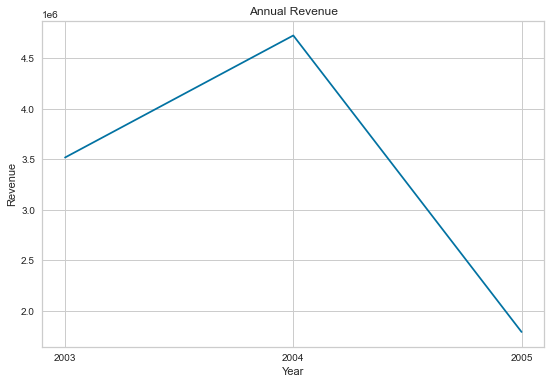

In [18]:
#Annual Revenue
plt.figure(figsize=(9,6))
df_sales.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()

Observation: As we dont have the complete set of data for 2005, analysing the Annual Revenue can be misleading. Instead, we can analyse Monthy Revenue.

## b) Monthly Revenue

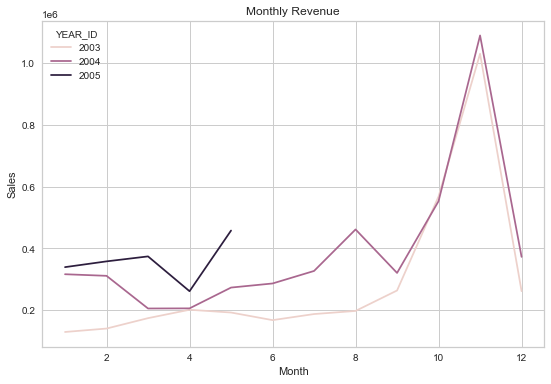

In [19]:
#Monthly Revenue
plt.figure(figsize=(9,6))

monthly_revenue = df_sales.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

Observation: This clearly shows that the revenue is growing especially in October and November. It can be the result of the seasonality (USA data for "Thanks Giving" and other festivities). We can also observe that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2005 can be further investigated to maintain high sales in future.

## c) Monthly Revenue Growth Rate:

In [20]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()

In [21]:
monthly_revenue.head()

YEAR_ID  MONTH_ID      SALES  MONTHLY GROWTH
0     2003         1  129753.60             NaN
1     2003         2  140836.19        0.085413
2     2003         3  174504.90        0.239063
3     2003         4  201609.55        0.155323
4     2003         5  192673.11       -0.044325

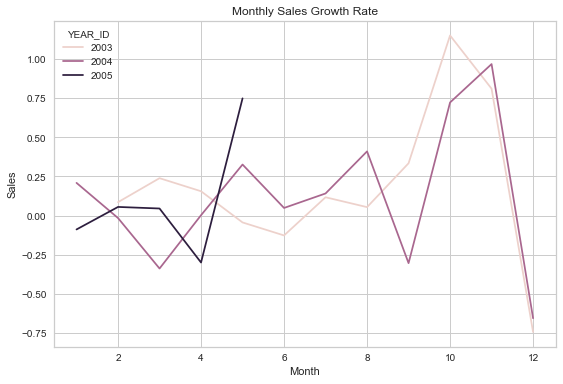

In [22]:
#Monthly Sales Growth Rate
plt.figure(figsize=(9,6))
sns.lineplot(x="MONTH_ID", y="MONTHLY GROWTH",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

Observation: Apart from expected high/low growth rates during the seasonal months, there is high growth rate from Apr 2005 to May 2005.

## d) Top 10 countries by Sales

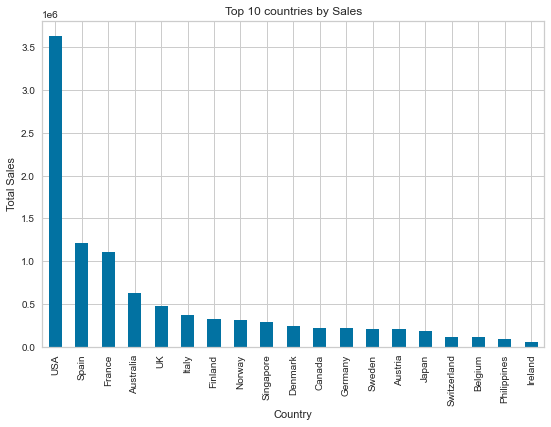

In [23]:
plt.figure(figsize=(9,6))
top_cities = df_sales.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

## e) Monthly Active Customers

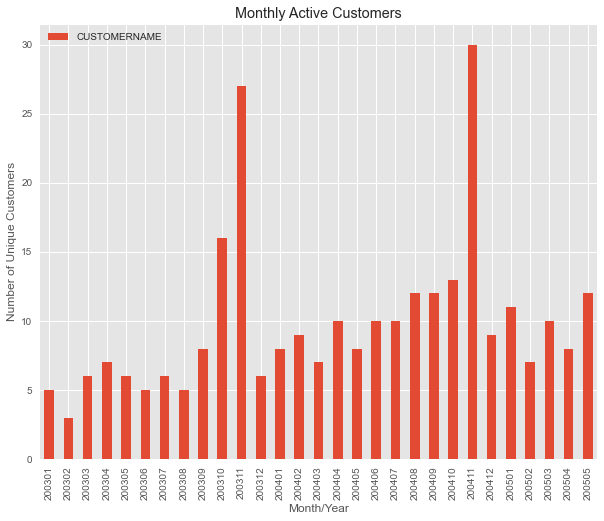

In [91]:
df_sales['YEAR_MONTH'] = df_sales['YEAR_ID'].map(str)+df_sales['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = df_sales.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME', figsize = (10,8))
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show()

Observation: As expected, customers are highly active during the months of October & November. The number of active customers increased from 2003 to 2004 which indicates that the company is successful in retention/acquisition of old/new customers.

## f) Average Sales per Order

In [25]:
#Average Sales per Order
average_revenue = df_sales.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()

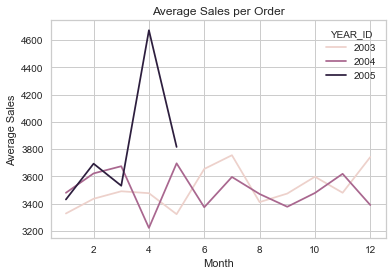

In [26]:
sns.lineplot(x="MONTH_ID", y="SALES", hue="YEAR_ID", data=average_revenue)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')
plt.show()

## g) New Customers Growth Rate

Definition: A new customer is whoever did his/her first purchase in the time window we have defined, i.e., Monthly in this analysis.

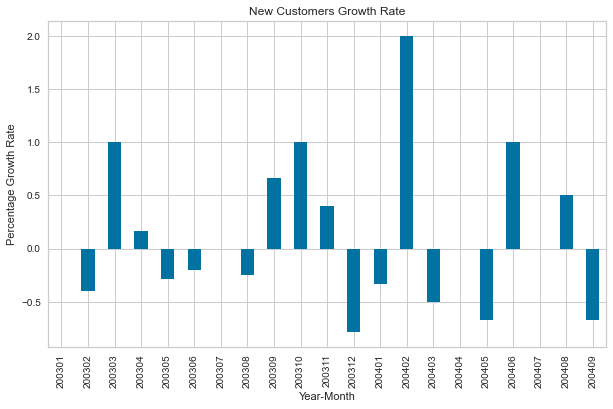

In [27]:
#New Customers Growth Rate
df_first_purchase = df_sales.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
df_first_purchase.columns = ['CUSTOMERNAME','FirstPurchaseDate']

# Plot Growth Rate
plt.figure(figsize=(10,6))
df_first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().plot(kind='bar')
plt.title('New Customers Growth Rate')
plt.xlabel('Year-Month')
plt.ylabel('Percentage Growth Rate')
plt.show()

Observation: The highest growth rate is observed in February 2004. This can be investigated further to better understand what factors contributed the growth.

## h) Customers first purchase date/month

In [28]:
# Customers first purchase date/month
df_first_purchase

# print(df_first_purchase.to_string())
# display(HTML(df_first_purchase.to_html()))

CUSTOMERNAME FirstPurchaseDate
0                AV Stores, Co.            200303
1                  Alpha Cognac            200307
2            Amica Models & Co.            200408
3       Anna's Decorations, Ltd            200309
4             Atelier graphique            200305
..                          ...               ...
87              Vida Sport, Ltd            200402
88              Vitachrome Inc.            200301
89     Volvo Model Replicas, Co            200303
90  West Coast Collectables Co.            200312
91            giftsbymail.co.uk            200403

[92 rows x 2 columns]

# 1.2 Clustering (Segmentation) with arbitrary number of clusters

In [29]:
# Sales ordered by Order date
df_sales['ORDERDATE'] = [d.date() for d in df_sales['ORDERDATE']]
df_sales.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

    ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... MSRP  PRODUCTCODE  \
0  2003-02-24  Shipped       1         2     2003  ...   95     S10_1678   
1  2003-05-07  Shipped       2         5     2003  ...   95     S10_1678   
2  2003-07-01  Shipped       3         7     2003  ...   95     S10_1678   
3  2003-08-25  Shipped       3         8     2003  ...   95     S10_1678   
4  2003-10-10  Shipped       4        10     2003  ...   95     S10_1678   

               CUSTOMERNAME           CITY COUNTRY TERRITORY CONTACTLASTNAME  \
0         Land of Toys Inc.            NYC     USA       NaN              Yu   
1        Reims Collectables          Reims  France      EMEA         Henriot   
2           Lyon Souveniers          Paris  France      EMEA        Da Cunha   
3         Toys4GrownUps.com       Pasadena     USA       NaN           Young   
4  Corporate Gift Ideas Co.  San Francisco     USA       NaN           Brown   

  CONTACTFIRSTNAME DEALSIZE YEAR_MONTH  
0             Kwai    Small     200302  
1             Paul    Small     200305  
2           Daniel   Medium     200307  
3            Julie   Medium     200308  
4            Julie   Medium     200310  

[5 rows x 21 columns]

## a) Calculate Recency, Frequency and Monetary value (RFM) for each customer

Assume now that we are analysing the next day of our latest order date in the data set. Creating a variable '*snapshot date*' which is the latest date in data set.

**Recency** : Recency is the number of days between the customer's latest order date and the snapshot date<br>
**Frequency**: Number of purchases made by the customer<br>
**MonetaryValue**: Revenue generated by the customer

In [30]:
# Calculate Recency, Frequency and Monetary value for each customer
snapshot_date = df_sales['ORDERDATE'].max() + dt.timedelta(days=1) #latest date in the data set
df_RFM = df_sales.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES':'sum'})

# Renaming the columns
df_RFM.rename(columns={'ORDERDATE': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'MonetaryValue'}, inplace=True)

In [31]:
df_RFM.head()

Recency  Frequency  MonetaryValue
CUSTOMERNAME                                              
AV Stores, Co.               196         51      157807.81
Alpha Cognac                  65         20       70488.44
Amica Models & Co.           265         26       94117.26
Anna's Decorations, Ltd       84         46      153996.13
Atelier graphique            188          7       24179.96

## b) Dividing customers into 4 segments (Randomly Chosen)

**Recency/Frequency/MonetaryValue** : Level 4 > Level 3> Level 2 > Level 1

* The lower the recency, the higher the Recency level<br>
* The higher the number of orders, the higher the Frequency level<br>
* The higher the monetary value, the higher the MonetaryValue level


In [32]:
#Dividing customers into 4 segments

# Create a spend quantile with 4 groups - a range between 1 and 5 and store them in the df_RFM dataframe
MonetaryValue_quantile = pd.qcut(df_RFM['MonetaryValue'], q=4, labels=range(1,5))
Recency_quantile = pd.qcut(df_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quantile = pd.qcut(df_RFM['Frequency'], q=4, labels=range(1,5))

# Assign the quantile values to the Spend_Quantile column in data
df_RFM['R'] = Recency_quantile
df_RFM['F'] = Frequency_quantile
df_RFM['M'] = MonetaryValue_quantile

#df_RFM[['MonetaryValue_quantile','Recency_quantile','Frequency_quantile']] = [MonetaryValue_quantile,Recency_quantile,Frequency_quantile]

df_RFM.sample(10)

Recency  Frequency  MonetaryValue  R  F  M
CUSTOMERNAME                                                              
Double Decker Gift Stores, Ltd      496         12       36019.04  1  1  1
La Rochelle Gifts                     1         53      180124.90  4  4  4
Heintze Collectables                222         27      100595.55  2  3  3
Iberia Gift Imports, Corp.          238         15       54723.62  1  1  1
Clover Collections, Co.             258         16       57756.43  1  1  1
Marta's Replicas Co.                231         27      103080.38  1  3  3
Norway Gifts By Mail, Co.           284         24       79224.23  1  2  2
Reims Collectables                   63         41      135042.94  4  4  4
Mini Wheels Co.                     195         21       74476.18  2  2  2
Petit Auto                            2         25       74972.52  4  2  2

In [33]:
# Print data with sorted Spend values
print(df_RFM.sort_values('MonetaryValue'))

                              Recency  Frequency  MonetaryValue  R  F  M
CUSTOMERNAME                                                            
Boards & Toys Co.                 113          3        9129.35  3  1  1
Atelier graphique                 188          7       24179.96  2  1  1
Auto-Moto Classics Inc.           180          8       26479.26  3  1  1
Microscale Inc.                   210         10       33144.93  2  1  1
Royale Belge                      142          8       33440.10  3  1  1
...                               ...        ...            ... .. .. ..
La Rochelle Gifts                   1         53      180124.90  4  4  4
Muscle Machine Inc                182         48      197736.94  3  4  4
Australian Collectors, Co.        184         55      200995.41  3  4  4
Mini Gifts Distributors Ltd.        3        180      654858.06  4  4  4
Euro Shopping Channel               1        259      912294.11  4  4  4

[92 rows x 6 columns]


## c) Create a new feature --> Calculating RFM_Score

In [34]:
# Calculate RFM_Score
df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.sample(10)

Recency  Frequency  MonetaryValue  R  F  M  \
CUSTOMERNAME                                                               
Motor Mint Distributors Inc.      196         23       83682.16  2  2  2   
Danish Wholesale Imports           47         36      145041.60  4  4  4   
Daedalus Designs Imports          466         20       69052.41  1  2  1   
Souveniers And Things Co.           3         46      151570.98  4  4  4   
Land of Toys Inc.                 198         49      164069.44  2  4  4   
Mini Gifts Distributors Ltd.        3        180      654858.06  4  4  4   
Lyon Souveniers                    76         20       78570.34  4  2  2   
Atelier graphique                 188          7       24179.96  2  1  1   
Handji Gifts& Co                   39         36      115498.73  4  4  3   
La Corne D'abondance, Co.         193         23       97203.68  2  2  3   

                              RFM_Score  
CUSTOMERNAME                             
Motor Mint Distributors Inc.          6  
Danish Wholesale Imports             12  
Daedalus Designs Imports              4  
Souveniers And Things Co.            12  
Land of Toys Inc.                    10  
Mini Gifts Distributors Ltd.         12  
Lyon Souveniers                       8  
Atelier graphique                     4  
Handji Gifts& Co                     11  
La Corne D'abondance, Co.             7

## d) Create a new feature --> Labelling the RFM_level

* RFM Score > 10 - **High Value Customer**<br>
* RFM SCore < 10 and RFM Score >= 6 - **Mid Value Customer**<br>
* RFM Score < 6 - **Low Value Customer**


In [35]:
## Labelling the Levels
# Define rfm_level function
def rfm_level(df):
    if np.bool(df['RFM_Score'] >= 10):
        return 'High Value Customer'
    elif np.bool((df['RFM_Score'] < 10) & (df['RFM_Score'] >= 6)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'

# Create a new variable RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

# Print sample with 10 rows to view
df_RFM.sample(10)

Recency  Frequency  MonetaryValue  R  F  M  \
CUSTOMERNAME                                                               
Petit Auto                          2         25       74972.52  4  2  2   
Toms Spezialitten, Ltd            228         26      100306.58  2  2  3   
Norway Gifts By Mail, Co.         284         24       79224.23  1  2  2   
Daedalus Designs Imports          466         20       69052.41  1  2  1   
Collectable Mini Designs Co.      461         25       87489.23  1  2  3   
Auto Canal Petit                   55         27       93170.66  4  3  3   
Oulu Toy Supplies, Inc.           121         32      104370.38  3  3  3   
Corrida Auto Replicas, Ltd        212         32      120615.28  2  3  4   
Royale Belge                      142          8       33440.10  3  1  1   
Marseille Mini Autos              146         25       74936.14  3  2  2   

                              RFM_Score            RFM_Level  
CUSTOMERNAME                                                  
Petit Auto                            8   Mid Value Customer  
Toms Spezialitten, Ltd                7   Mid Value Customer  
Norway Gifts By Mail, Co.             5   Low Value Customer  
Daedalus Designs Imports              4   Low Value Customer  
Collectable Mini Designs Co.          6   Mid Value Customer  
Auto Canal Petit                     10  High Value Customer  
Oulu Toy Supplies, Inc.               9   Mid Value Customer  
Corrida Auto Replicas, Ltd            9   Mid Value Customer  
Royale Belge                          5   Low Value Customer  
Marseille Mini Autos                  7   Mid Value Customer

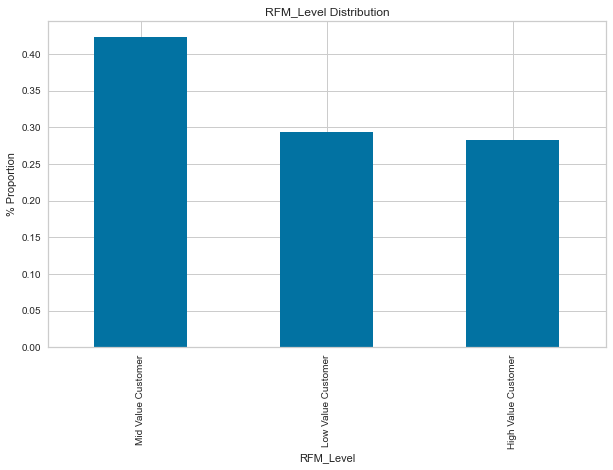

In [36]:
# Plot RFM_Level
plt.figure(figsize=(10,6))
df_RFM['RFM_Level'].value_counts(normalize = True).plot(kind='bar')
plt.title('RFM_Level Distribution')
plt.xlabel('RFM_Level')
plt.ylabel('% Proportion')
plt.show()

**Higher the monetary value, higher the MonetaryValue level**

In [37]:
## Analysing customer segments
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = df_RFM.groupby(['RFM_Level']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue':['mean','count']}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                    Recency Frequency MonetaryValue      
                       mean      mean          mean count
RFM_Level                                                
High Value Customer    85.0      54.3      193532.1    26
Low Value Customer    293.8      15.0       52414.6    27
Mid Value Customer    171.2      25.8       91938.5    39


**Label Encoding RFM_level**

In [38]:
## Label encoding the RFM_Levels
# Define set_rfm_label function
def set_rfm_label(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
event_dictionary ={'High Value Customer' : 2, 'Mid Value Customer' : 1, 'Low Value Customer' : 0} 
  
# Add a new column named 'RFM_Level_Label' 
df_RFM['RFM_Level_Label'] = df_RFM['RFM_Level'].apply(set_rfm_label, args =(event_dictionary, )) 
  
# Print sample with 10 rows to view
df_RFM.sample(10)

Recency  Frequency  MonetaryValue  R  F  M  \
CUSTOMERNAME                                                                 
Australian Collectors, Co.          184         55      200995.41  3  4  4   
Souveniers And Things Co.             3         46      151570.98  4  4  4   
Osaka Souveniers Co.                414         20       67605.07  1  2  1   
Men 'R' US Retailers, Ltd.          509         14       48048.46  1  1  1   
Gifts4AllAges.com                    26         26       83209.88  4  2  2   
Motor Mint Distributors Inc.        196         23       83682.16  2  2  2   
Signal Collectibles Ltd.            477         15       50218.51  1  1  1   
Canadian Gift Exchange Network      222         22       75238.92  2  2  2   
Australian Collectables, Ltd         23         23       64591.46  4  2  1   
Australian Gift Network, Co         119         15       59469.12  3  1  1   

                                RFM_Score            RFM_Level  \
CUSTOMERNAME                                                     
Australian Collectors, Co.             11  High Value Customer   
Souveniers And Things Co.              12  High Value Customer   
Osaka Souveniers Co.                    4   Low Value Customer   
Men 'R' US Retailers, Ltd.              3   Low Value Customer   
Gifts4AllAges.com                       8   Mid Value Customer   
Motor Mint Distributors Inc.            6   Mid Value Customer   
Signal Collectibles Ltd.                3   Low Value Customer   
Canadian Gift Exchange Network          6   Mid Value Customer   
Australian Collectables, Ltd            7   Mid Value Customer   
Australian Gift Network, Co             5   Low Value Customer   

                                RFM_Level_Label  
CUSTOMERNAME                                     
Australian Collectors, Co.                    2  
Souveniers And Things Co.                     2  
Osaka Souveniers Co.                          0  
Men 'R' US Retailers, Ltd.                    0  
Gifts4AllAges.com                             1  
Motor Mint Distributors Inc.                  1  
Signal Collectibles Ltd.                      0  
Canadian Gift Exchange Network                1  
Australian Collectables, Ltd                  1  
Australian Gift Network, Co                   0

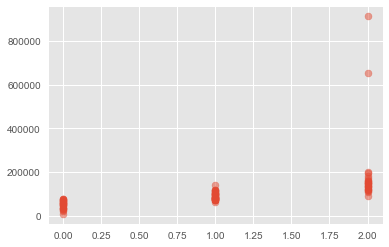

In [39]:
#Scatter Plot of MonetaryValue & RFM_Level_Label
plt.style.use('ggplot')
plt.scatter('RFM_Level_Label', 'MonetaryValue', data=df_RFM, alpha=0.5)
plt.show()

# 2. Segmentation using KMeans Clustering

## a) Data Preprocessing for KMeans

**K Means Assumptions:**

* All variables have symmetrical (Normal) Distribution <br>
* All Variables have same average value (approx)<br>
* All Variables have same variance (approx)

**Check the distribution of the variables **

In [40]:
df_KMC = df_RFM[['Recency','Frequency','MonetaryValue']]
df_KMC.head()

Recency  Frequency  MonetaryValue
CUSTOMERNAME                                              
AV Stores, Co.               196         51      157807.81
Alpha Cognac                  65         20       70488.44
Amica Models & Co.           265         26       94117.26
Anna's Decorations, Ltd       84         46      153996.13
Atelier graphique            188          7       24179.96

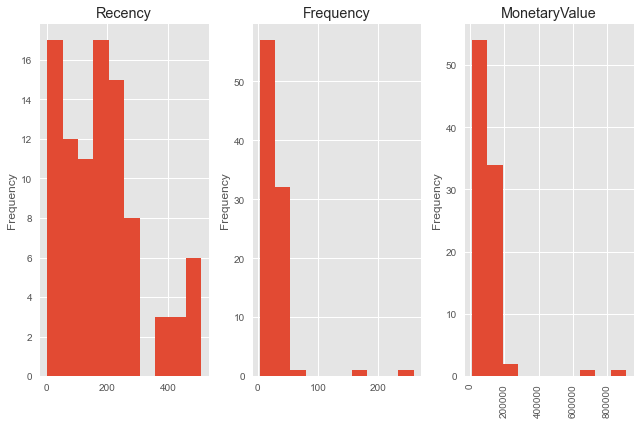

In [41]:
plt.figure(figsize=(9,6))

plt.subplot(1,3,1)
df_KMC['Recency'].plot(kind='hist')
plt.title('Recency')

plt.subplot(1,3,2)
df_KMC['Frequency'].plot(kind='hist')
plt.title('Frequency')

plt.subplot(1,3,3)
df_KMC['MonetaryValue'].plot(kind='hist')
plt.xticks(rotation = 90)
plt.title('MonetaryValue')

plt.tight_layout()
plt.show()

## b) Removing skewness by performing a log transform on the variables

In [42]:
df_KMC_log = np.log(df_KMC)

In [43]:
df_KMC_log.head(10)

Recency  Frequency  MonetaryValue
CUSTOMERNAME                                                    
AV Stores, Co.                5.278115   3.931826      11.969133
Alpha Cognac                  4.174387   2.995732      11.163204
Amica Models & Co.            5.579730   3.258097      11.452297
Anna's Decorations, Ltd       4.430817   3.828641      11.944683
Atelier graphique             5.236442   1.945910      10.093279
Australian Collectables, Ltd  3.135494   3.135494      11.075837
Australian Collectors, Co.    5.214936   4.007333      12.211037
Australian Gift Network, Co   4.779123   2.708050      10.993212
Auto Assoc. & Cie.            5.451038   2.890372      11.079590
Auto Canal Petit              4.007333   3.295837      11.442188

### Distribution of Recency, Frequency and MonetaryValue after Log Transform

C:\Users\mattb\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mattb\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mattb\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

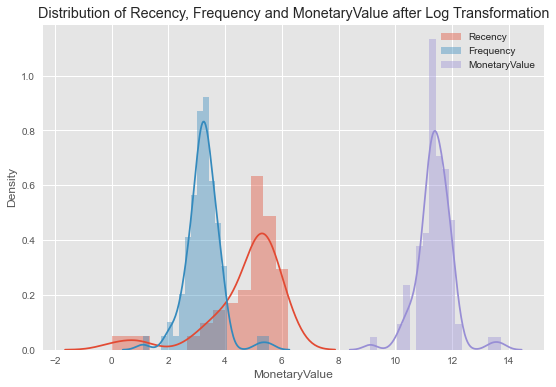

In [44]:
plt.figure(figsize=(9,6))

#plt.subplot(1,3,1)
sns.distplot(df_KMC_log['Recency'],label='Recency')

#plt.subplot(1,3,1)
sns.distplot(df_KMC_log['Frequency'],label='Frequency')

#plt.subplot(1,3,1)
sns.distplot(df_KMC_log['MonetaryValue'],label='MonetaryValue')

plt.title('Distribution of Recency, Frequency and MonetaryValue after Log Transformation')
plt.legend()
plt.show()

## c) Standardising the variables using StandardScaler() for equal variance and mean

In [45]:
# Initialise a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(df_KMC_log)

# Scale and center the data
data_normalised = scaler.transform(df_KMC_log)

# Create a pandas DataFrame
data_normalised = pd.DataFrame(data_normalised, index=df_KMC_log.index, columns=df_KMC_log.columns)

# Print summary statistics
data_normalised.describe().round(2)

Recency  Frequency  MonetaryValue
count    92.00      92.00          92.00
mean      0.00      -0.00           0.00
std       1.01       1.01           1.01
min      -3.51      -3.67          -3.82
25%      -0.24      -0.41          -0.39
50%       0.37       0.06          -0.04
75%       0.53       0.45           0.52
max       1.12       4.03           3.92

# 3. Build a Model

***Choosing number of by Clusters using Elbow Method***

## a) Build a Model - Finding a K-value using SSE

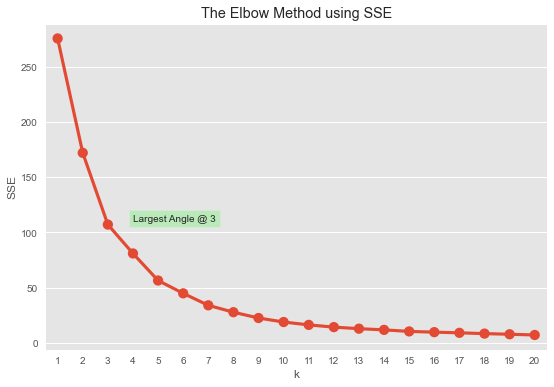

In [46]:
## Fit KMeans and calculate SSE for each k:
## Sum Squared Errors is the sum of the squared distance between centroid and each member of the cluster

sse={}
# Building and Training (fitting) the model 
for k in range(1, 21):
    kmeans_model_sse = KMeans(n_clusters=k, random_state=1)
    kmeans_model_sse.fit(data_normalised)
    sse[k] = kmeans_model_sse.inertia_ 
 
plt.figure(figsize=(9,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method using SSE')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.text(3,110,"Largest Angle @ 3",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

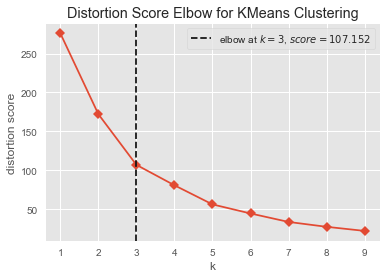

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# Instantiate the clustering visualizer - Yellowbrick.cluster KElbowVisualizer

visualizer = KElbowVisualizer(kmeans_model_sse, k=(1,10), metric='distortion', timings=False)

visualizer.fit(data_normalised)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure
# plt.text(3,110,"Both visualizers agree on k=3 clusters", bbox=dict(facecolor='lightgreen', alpha=0.5))

# Score/metric - distortion - is based on distortion (default) : 3
# Score/metric - calinski_harabasz - computes the ratio of dispersion between and within clusters :3
# Score/metric - silhouette - score calculates the mean Silhouette Coefficient of all samples : 3

In [48]:
#Shape of cluster centres
kmeans_model_sse.cluster_centers_.shape

(9, 3)

In [49]:
# Evaluate quality of fit
kmeans_model_sse.score(data_normalised)

# Opposite of the value of X on the K-means Objective

-22.375154081889583

In [50]:
# The objective function - K-Means Objective:
# The objective in K-means is to reduce the sum of squares of the distances of points from their respective 
# cluster centroids. This value tells how internally coherent the clusters are. (The less the better)
kmeans_model_sse.inertia_

22.375154081889562

In [51]:
# silhouette_score
print('silhouette score:    ', silhouette_score(data_normalised, kmeans_model_sse.labels_, metric='euclidean'))

silhouette score:     0.4059664016925001


In [52]:
# Printing K to find optimal elbow (manually)
sse

# Highest ROC is @3

{1: 276.0,
 2: 172.22936787131962,
 3: 107.15163387905795,
 4: 80.94378402824697,
 5: 56.411995497285254,
 6: 44.762975297863136,
 7: 33.89438833815932,
 8: 27.645237994347298,
 9: 22.375154081889562,
 10: 18.730850654062344,
 11: 16.137980127819663,
 12: 14.109355612853273,
 13: 12.696753705628883,
 14: 11.608612347952054,
 15: 10.214807369434018,
 16: 9.539847235867075,
 17: 8.921335836389455,
 18: 8.235900708629082,
 19: 7.640341322604479,
 20: 6.981521103778384}

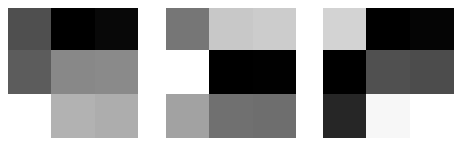

In [53]:
## Plotting the shape of cluster centres
fig, ax = plt.subplots(1, 3, figsize=(8, 3))
centers = kmeans_model_sse.cluster_centers_.reshape(3, 3, 3)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## b) Build a Model - Finding a K-value using Distortion & Inertias

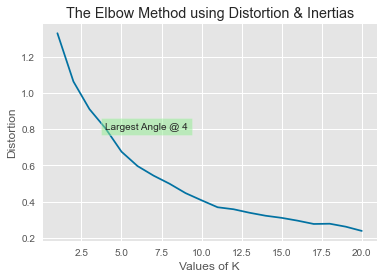

In [54]:
# Elbow Method For Optimal k using Distortion & Inertias
from scipy.spatial.distance import cdist

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,21) 

for k in K: 
    # Building and Training (fitting) the model  
    kmeans_model_disto = KMeans(n_clusters=k).fit(data_normalised) 
    kmeans_model_disto.fit(data_normalised)     
      
    distortions.append(sum(np.min(cdist(data_normalised, kmeans_model_disto.cluster_centers_, 
                      'euclidean'),axis=1)) / data_normalised.shape[0]) 
    inertias.append(kmeans_model_disto.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(data_normalised, kmeans_model_disto.cluster_centers_, 
                 'euclidean'),axis=1)) / data_normalised.shape[0] 
    mapping2[k] = kmeans_model_disto.inertia_

    
# Plot of Elbow Method For Optimal k
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion & Inertias') 
plt.text(4,0.8,"Largest Angle @ 4",bbox=dict(facecolor='lightgreen', alpha=0.5))

plt.show()

In [55]:
#Shape of cluster centres
kmeans_model_disto.cluster_centers_.shape

(20, 3)

***Out of 4 different elbow methods run for this model, 1 picks k=4 clusters, the others are k=3 clusters***

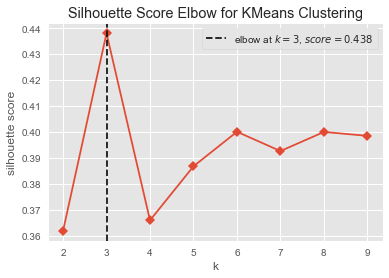

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [56]:
# Instantiate the clustering visualizer - Yellowbrick.cluster KElbowVisualizer

visualizer = KElbowVisualizer(kmeans_model_disto, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(data_normalised)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

# Score/metric - distortion - is based on distortion (default) : 3
# Score/metric - calinski_harabasz - computes the ratio of dispersion between and within clusters :3
# Score/metric - silhouette - score calculates the mean Silhouette Coefficient of all samples : 3

In [57]:
# Evaluate quality of fit
kmeans_model_disto.score(data_normalised)

# Opposite of the value of X on the K-means Objective

-22.048268013472335

In [58]:
# The objective function - K-Means Objective:
# The objective in K-means is to reduce the sum of squares of the distances of points from their respective 
# cluster centroids. This value tells how internally coherent the clusters are. (The less the better)
kmeans_model_disto.inertia_

22.048268013472317

In [59]:
# Printing K to find optimal elbow (manually)
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))
# Highest ROC is @4

1 : 1.3280985408716666
2 : 1.0621755044161263
3 : 0.9101113473204417
4 : 0.8043456720767818
5 : 0.6757398186163374
6 : 0.5966068166699917
7 : 0.5439405973968927
8 : 0.49920500751313485
9 : 0.44753187476198447
10 : 0.4079359237726609
11 : 0.3696312433800161
12 : 0.3586085660835085
13 : 0.3392444018903152
14 : 0.3229038566084125
15 : 0.3112611006217263
16 : 0.2957250883353423
17 : 0.27762058650810223
18 : 0.27897482322030603
19 : 0.2626486508028151
20 : 0.23935058175951623


## c) Implementing KMeans model with 3 clusters

In [60]:
## Initialise KMeans
kmeans_model_sse = KMeans(n_clusters=3, random_state=1) 

## Fit & Train k-means clustering on the normalised data set
kmeans_model_sse.fit(data_normalised)

# Extract cluster labels
cluster_labels_sse = kmeans_model_sse.labels_

## Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
df_rfm_sse = df_KMC.assign(Cluster=cluster_labels_sse)
df_rfm_sse.sample(10)

Recency  Frequency  MonetaryValue  Cluster
CUSTOMERNAME                                                            
Dragon Souveniers, Ltd.            91         43      172989.68        1
Suominen Souveniers               146         30      113961.15        1
Signal Collectibles Ltd.          477         15       50218.51        0
Reims Collectables                 63         41      135042.94        1
Auto Assoc. & Cie.                233         18       64834.32        0
Collectable Mini Designs Co.      461         25       87489.23        1
Blauer See Auto, Co.              208         22       85171.59        1
Danish Wholesale Imports           47         36      145041.60        1
UK Collectables, Ltd.              54         29      118008.27        1
Mini Gifts Distributors Ltd.        3        180      654858.06        2

In [61]:
# Group the data by cluster
grouped = df_rfm_sse.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         302.0      14.0       48612.0    23
1         157.0      30.0      108232.0    63
2           2.0      99.0      349326.0     6

**Cluster 2 has the highest MonetaryValue mean and lowest Recency mean and the highest frequency mean — This is our ideal customer segment**

**Cluster 1 shopped with us recently (last 6 months) but have not spend as much or as frequently as we would like them to — perhaps some personalization of products targeted at them can help to maximize their lifetime-value?**

**Cluster 0 has spent a small amount with us but has not shopped with us in the 10 months — We will need to do something before we lose them!**

C:\Users\mattb\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


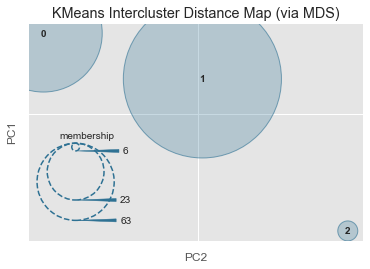

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [62]:
# Instantiate the clustering visualizer - InterclusterDistance
kmeans_model_sse = KMeans(n_clusters=3, random_state=1)
visualizer = InterclusterDistance(kmeans_model_sse)

visualizer.fit(data_normalised)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [63]:
#Generate cluster predictions and store in y_hat
y_hat_3 = kmeans_model_sse.fit_predict(data_normalised)

In [64]:
y_hat_3

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1])

In [65]:
# Get the labels for the models - 3 clusters
RFM_Level_Label = np.array(df_RFM['RFM_Level_Label'])
RFM_Level_Label

array([2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 0, 0, 1], dtype=int64)

In [66]:
df_RFM['RFM_Level_Label']

CUSTOMERNAME
AV Stores, Co.                 2
Alpha Cognac                   1
Amica Models & Co.             1
Anna's Decorations, Ltd        2
Atelier graphique              0
                              ..
Vida Sport, Ltd                1
Vitachrome Inc.                1
Volvo Model Replicas, Co       0
West Coast Collectables Co.    0
giftsbymail.co.uk              1
Name: RFM_Level_Label, Length: 92, dtype: int64

In [67]:
# homogeneity_completeness_v_measure
sklearn.metrics.homogeneity_completeness_v_measure(RFM_Level_Label, y_hat_3, beta=1.0)

#homogeneity 0-1 : 1.0 stands for perfectly homogeneous labeling
#completeness 0-1 : 1.0 for perfectly complete labeling
#v_measure: harmonic mean of the first two

(0.43665072493310025, 0.6019831448967842, 0.5061579142604717)

In [68]:
# Option 1 - v_scores:
print('v_measure_score:    ', v_measure_score(RFM_Level_Label, y_hat_3, beta=1.0))

# ## Option 2 - v_scores:
# v_scores = [] 
# ## Building the clustering model 
# ## kmeans_model_sse
  
# ## Training the clustering model 
# kmeans_model_sse.fit(data_normalised) 
  
# ## Storing the predicted Clustering labels 
# labels3 = kmeans_model_sse.predict(data_normalised) 
  
# ## Evaluating the performance 
# v_scores.append(v_measure_score(y_hat_3, RFM_Level_Label)) 
# v_scores

v_measure_score:     0.5061579142604717


In [69]:
## Matching each learned cluster label with the true labels found in them

from scipy.stats import mode
tag = []
labels = np.zeros_like(y_hat_3)

for i in range(3):

## Print out Predicted labels
    print("Predicted Label:   ", i)

## Print out True labels
    temp_list = RFM_Level_Label[y_hat_3==i]
    tag.append( mode((temp_list)))
    print("True Label:        ", mode((temp_list)))

## Tags of new train data    
new_train_data_y = np.asarray(tag)    
new_train_data_y = np.ravel(new_train_data_y[:,0])

# for i in range(3):
#     
#     mask = (y_hat_3 == i)
#     print(y_hat_3)
#     print(mask)
#     print((RFM_Level_Label['RFM_Level_Label'][mask]))
#     print(mode(RFM_Level_Label['RFM_Level_Label'][mask])[0])
#     labels[mask] = mode(RFM_Level_Label['RFM_Level_Label'][mask])[0]

Predicted Label:    0
True Label:         ModeResult(mode=array([0], dtype=int64), count=array([23]))
Predicted Label:    1
True Label:         ModeResult(mode=array([1], dtype=int64), count=array([38]))
Predicted Label:    2
True Label:         ModeResult(mode=array([2], dtype=int64), count=array([5]))


**# If the predicted labels didn't match up. i.e.  0 = 1, then you need to change the tags to the true labels** <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***1. Test (5) samples from each true class/cluster***<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***2. Find the cluster centres - then pass the (5) samples to KNN with 1NN***<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***3. Find the tags/labels --> change the tags/ labels if they don't match to the true labels***<br />

In [70]:
# Cluster values of new labels (tags)
new_train_data_y

array([0, 1, 2], dtype=int64)

In [71]:
RFM_Level_Label

array([2, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1,
       2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 0, 0, 1], dtype=int64)

In [72]:
# y_hat_3
# print(y_hat_3)

In [73]:
## Check how accurate our unsupervised clustering was in finding similar digits within the data
# from sklearn.metrics import accuracy_score
# accuracy_score(RFM_Level_Label, y_hat_3)

## d) Implementing KMeans model with 4 clusters

In [74]:
## Initialise KMeans
kmeans_model_disto = KMeans(n_clusters=4, random_state=1) 

## Fit & Train k-means clustering on the normalised data set
kmeans_model_disto.fit(data_normalised)

# Extract cluster labels
cluster_labels_disto = kmeans_model_disto.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
df_rfm_disto = df_KMC.assign(Cluster=cluster_labels_disto)
df_rfm_disto.sample(10)

Recency  Frequency  MonetaryValue  Cluster
CUSTOMERNAME                                                              
Saveley & Henriot, Co.              456         41      142874.25        0
Toys4GrownUps.com                   140         30      104561.96        0
La Corne D'abondance, Co.           193         23       97203.68        0
Mini Classics                       229         26       85555.99        0
FunGiftIdeas.com                     90         26       98923.73        0
Collectable Mini Designs Co.        461         25       87489.23        0
Australian Gift Network, Co         119         15       59469.12        1
Alpha Cognac                         65         20       70488.44        0
Canadian Gift Exchange Network      222         22       75238.92        0
Atelier graphique                   188          7       24179.96        1

In [75]:
# Group the data by cluster
grouped = df_rfm_disto.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         161.2      30.1      106986.8    61
1         301.7      13.7       48611.9    23
2           7.5      39.0      136867.8     6
3           2.0     219.5      783576.1     2

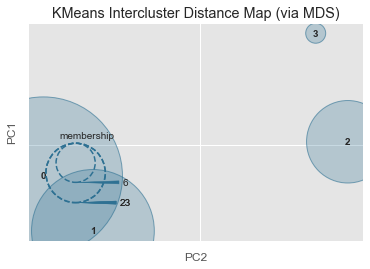

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [76]:
# Instantiate the clustering visualizer - InterclusterDistance
kmeans_model_disto = KMeans(n_clusters=4, random_state=1)
visualizer = InterclusterDistance(kmeans_model_disto)

visualizer.fit(data_normalised)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [77]:
#Generate cluster predictions and store in y_hat
y_hat_4 = kmeans_model_disto.fit_predict(data_normalised)

In [78]:
y_hat_4

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [79]:
# # Option 1 - v_scores:
# print('v_measure_score:    ', v_measure_score(RFM_Level_Label, y_hat_4, beta=1.0))

# ## Option 2 - v_scores:
# v_scores = [] 
# ## Building the clustering model 
# ## kmeans_model_disto
  
# ## Training the clustering model 
# kmeans_model_disto.fit(data_normalised) 
  
# ## Storing the predicted Clustering labels 
# labels5 = kmeans_model_disto.predict(data_normalised) 
  
# ## Evaluating the performance 
# v_scores.append(v_measure_score(y_hat_5, RFM_Level_Label)) 
# v_scores

In [80]:
# silhouette_score
print('silhouette score:    ', silhouette_score(data_normalised, kmeans_model_disto.labels_, metric='euclidean'))

silhouette score:     0.43402856985848326


# 4. Building Customer Personas

Customer Pesonas can be built by determining the summary stats of RFM values or Snake Plot. Snake Plots is a Market Research technique used to compare segments.
Visual representation of each segment's attributes helps us to determine the relative importance of segment attributes

## a) Snake Plot

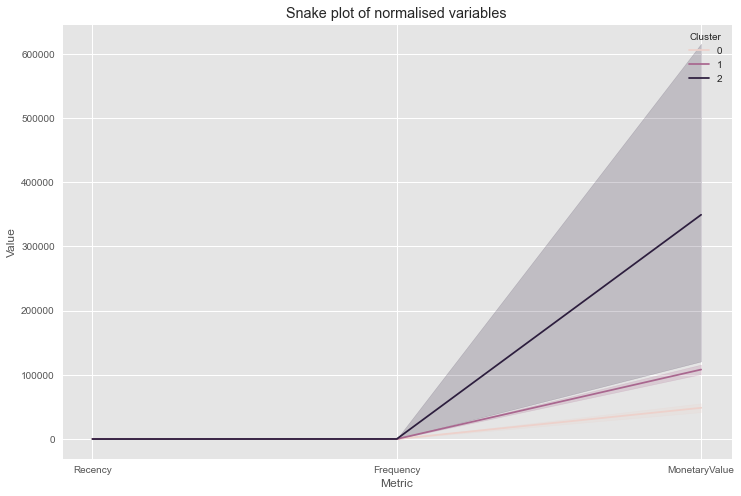

In [81]:
# Using Distortions & 3 Clusters
df_rfm_melt = pd.melt(df_rfm_sse.reset_index(), id_vars=['CUSTOMERNAME', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        var_name='Metric', value_name='Value')

plt.figure(figsize=(12,8))
# Add the plot title
plt.title('Snake plot of normalised variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=df_rfm_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

## b) Calculating relative importance of each attribute

In [82]:
# Calculate average RFM values for each cluster
cluster_avg = df_rfm_sse.groupby(['Cluster']).mean() 
print(cluster_avg)

            Recency  Frequency  MonetaryValue
Cluster                                      
0        301.695652  13.739130   48611.866957
1        156.650794  30.365079  108231.701587
2          2.000000  99.000000  349326.451667


In [83]:
# Calculate average RFM values for the total customer population
population_avg = df_KMC.mean()
print(population_avg)

Recency             182.826087
Frequency            30.684783
MonetaryValue    109050.313587
dtype: float64


In [84]:
# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance score rounded to 2 decimals
print(relative_imp.round(2))

         Recency  Frequency  MonetaryValue
Cluster                                   
0           0.65      -0.55          -0.55
1          -0.14      -0.01          -0.01
2          -0.99       2.23           2.20


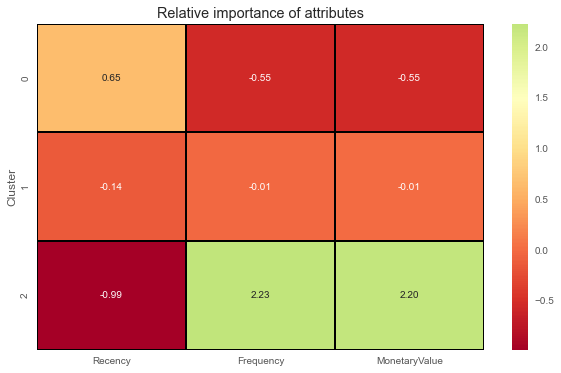

In [85]:
#Plot Relative Importance

# Initialise a plot 
plt.figure(figsize=(10, 6))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn',  linewidths=1.0, linecolor='black', center=1.50)
plt.show()

# 5. Visualizing Our K-Means Clusters

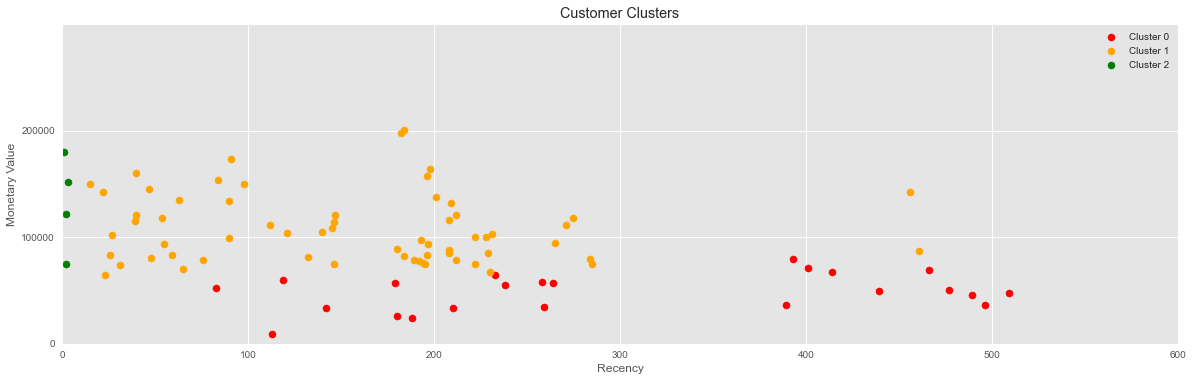

In [86]:
# Plot RFM distributions - Recency vs Monetary Value
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 1);
plt.scatter(df_rfm_sse[cluster_labels_sse == 0].loc[:,'Recency'], df_rfm_sse[cluster_labels_sse == 0].loc[:,'MonetaryValue'], s= 50, c='red', label = 'Cluster 0', alpha=1)
plt.scatter(df_rfm_sse[cluster_labels_sse == 1].loc[:,'Recency'], df_rfm_sse[cluster_labels_sse == 1].loc[:,'MonetaryValue'], s= 50, c='orange', label = 'Cluster 1', alpha=1)
plt.scatter(df_rfm_sse[cluster_labels_sse == 2].loc[:,'Recency'], df_rfm_sse[cluster_labels_sse == 2].loc[:,'MonetaryValue'], s= 50, c='green', label = 'Cluster 2', alpha=1)
plt.xticks(np.arange(0, 1000, 100)) 
plt.yticks(np.arange(0, 300000, 100000))
axes = plt.gca()
axes.set_xlim(0, 600)
axes.set_ylim(0,300000)
plt.title('Customer Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend()

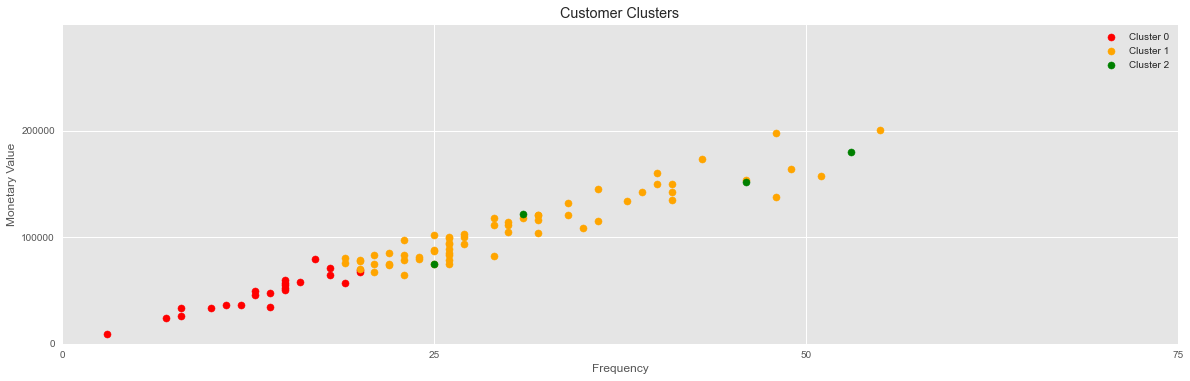

In [87]:
# Plot RFM distributions - Frequency vs Monetary Value
plt.figure(figsize=(20,20))
plt.subplot(3, 1, 2);
plt.scatter(df_rfm_sse[cluster_labels_sse == 0].loc[:,'Frequency'], df_rfm_sse[cluster_labels_sse == 0].loc[:,'MonetaryValue'], s= 50, c='red', label = 'Cluster 0', alpha=1)
plt.scatter(df_rfm_sse[cluster_labels_sse == 1].loc[:,'Frequency'], df_rfm_sse[cluster_labels_sse == 1].loc[:,'MonetaryValue'], s= 50, c='orange', label = 'Cluster 1', alpha=1)
plt.scatter(df_rfm_sse[cluster_labels_sse == 2].loc[:,'Frequency'], df_rfm_sse[cluster_labels_sse == 2].loc[:,'MonetaryValue'], s= 50, c='green', label = 'Cluster 2', alpha=1)
plt.xticks(np.arange(0, 1000, 25)) 
plt.yticks(np.arange(0, 300000, 100000))
axes = plt.gca()
axes.set_xlim(0, 75)
axes.set_ylim(0, 300000)
plt.title('Customer Clusters')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend()

In [88]:
# # Plot RFM distributions - Tenure vs Monetary Value
# plt.subplot(3, 1, 3);
# plt.scatter(df_rfm_sse[cluster_labels_sse == 0].loc[:,'Tenure'], data_process_k4[cluster_labels_sse == 0].loc[:,'MonetaryValue'], s= 10, cmap='red', label = 'Cluster 0', alpha=0.75)
# plt.scatter(df_rfm_sse[cluster_labels_sse == 1].loc[:,'Tenure'], data_process_k4[cluster_labels_sse == 1].loc[:,'MonetaryValue'], s= 10, cmap='green', label = 'Cluster 1', alpha=0.75)
# plt.scatter(df_rfm_sse[cluster_labels_sse == 2].loc[:,'Tenure'], data_process_k4[cluster_labels_sse == 2].loc[:,'MonetaryValue'], s= 10, cmap='blue', label = 'Cluster 2', alpha=0.75)
# plt.xticks(np.arange(0, 1000, 100)) 
# plt.yticks(np.arange(0, 300000, 100000))
# axes = plt.gca()
# axes.set_xlim(0, 100)
# axes.set_ylim(0, 300000)
# plt.title('Cusomter Clusters')
# plt.xlabel('Tenure')
# plt.ylabel('Monetary Value')
# plt.legend()

In [89]:
#print(k_means.labels_)
#print(kmeans_model_sse.labels_)
#print(y_test)